<h2>Wine Quality</h2>

In [544]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
import pickle
import pandas as pd
import os
import math
import seaborn as sns

<h3>Загрузка данных</h3>

In [545]:
# Данные можно скачать по ссылке: https://www.kaggle.com/datasets/rajyellow46/wine-quality
file_path = "winequalityN.csv"

data = pd.read_csv(file_path, parse_dates=True)

data.head()
mix_data = data.sample(frac=1).reset_index(drop=True)
mix_data.head()
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<h4> Наличие пропусков и общая статистика

In [546]:
names = ['type', 'fixed acidity','volatile acidity', 'citric acid',	'residual sugar', 'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH', 'sulphates',	'alcohol', 'quality']
colors = ['#9932CCAF', '#98F5FFAF', '#FFD39BAF', '#8B2323AF', '#FF4040AF', '#0000FFAF', '#E3CF57AF', '#00FFFFAF', '#FF1493AF', '#228B22AF', '#7FFF00AF', '#8B0A50AF', '#5D478BAF']
data_without_miss = mix_data.dropna()

print(" len data: {}".format(len(data)))
print(" len data_without_miss: {}".format(len(data_without_miss)))

statistics = pd.DataFrame()  

statistics['name'] = names[1:]

mean_true = []
mean_false = []
mean = []
for i in range(1, len(names)):
    true_water = data_without_miss['quality'] >= 5
    false_water = data_without_miss['quality'] < 5
    mean_true.append(data_without_miss.loc[true_water, names[i]].mean())
    mean_false.append(data_without_miss.loc[false_water, names[i]].mean())
    mean.append(data_without_miss[names[i]].mean())
statistics['mean true'] = mean_true
statistics['mean false'] = mean_false
statistics['mean'] = mean

statistics

mix_data = data_without_miss

mix_data.describe()

 len data: 6497
 len data_without_miss: 6463


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Так как количество элементов с отсутствием значений составляют примерно 0.5% от размера всей выборки, то их можно не учитывать. Анализируя статистические данные можно предположить, что присутствуют выбросы 

<h4> Анализ выбросов и сбалансированности данных

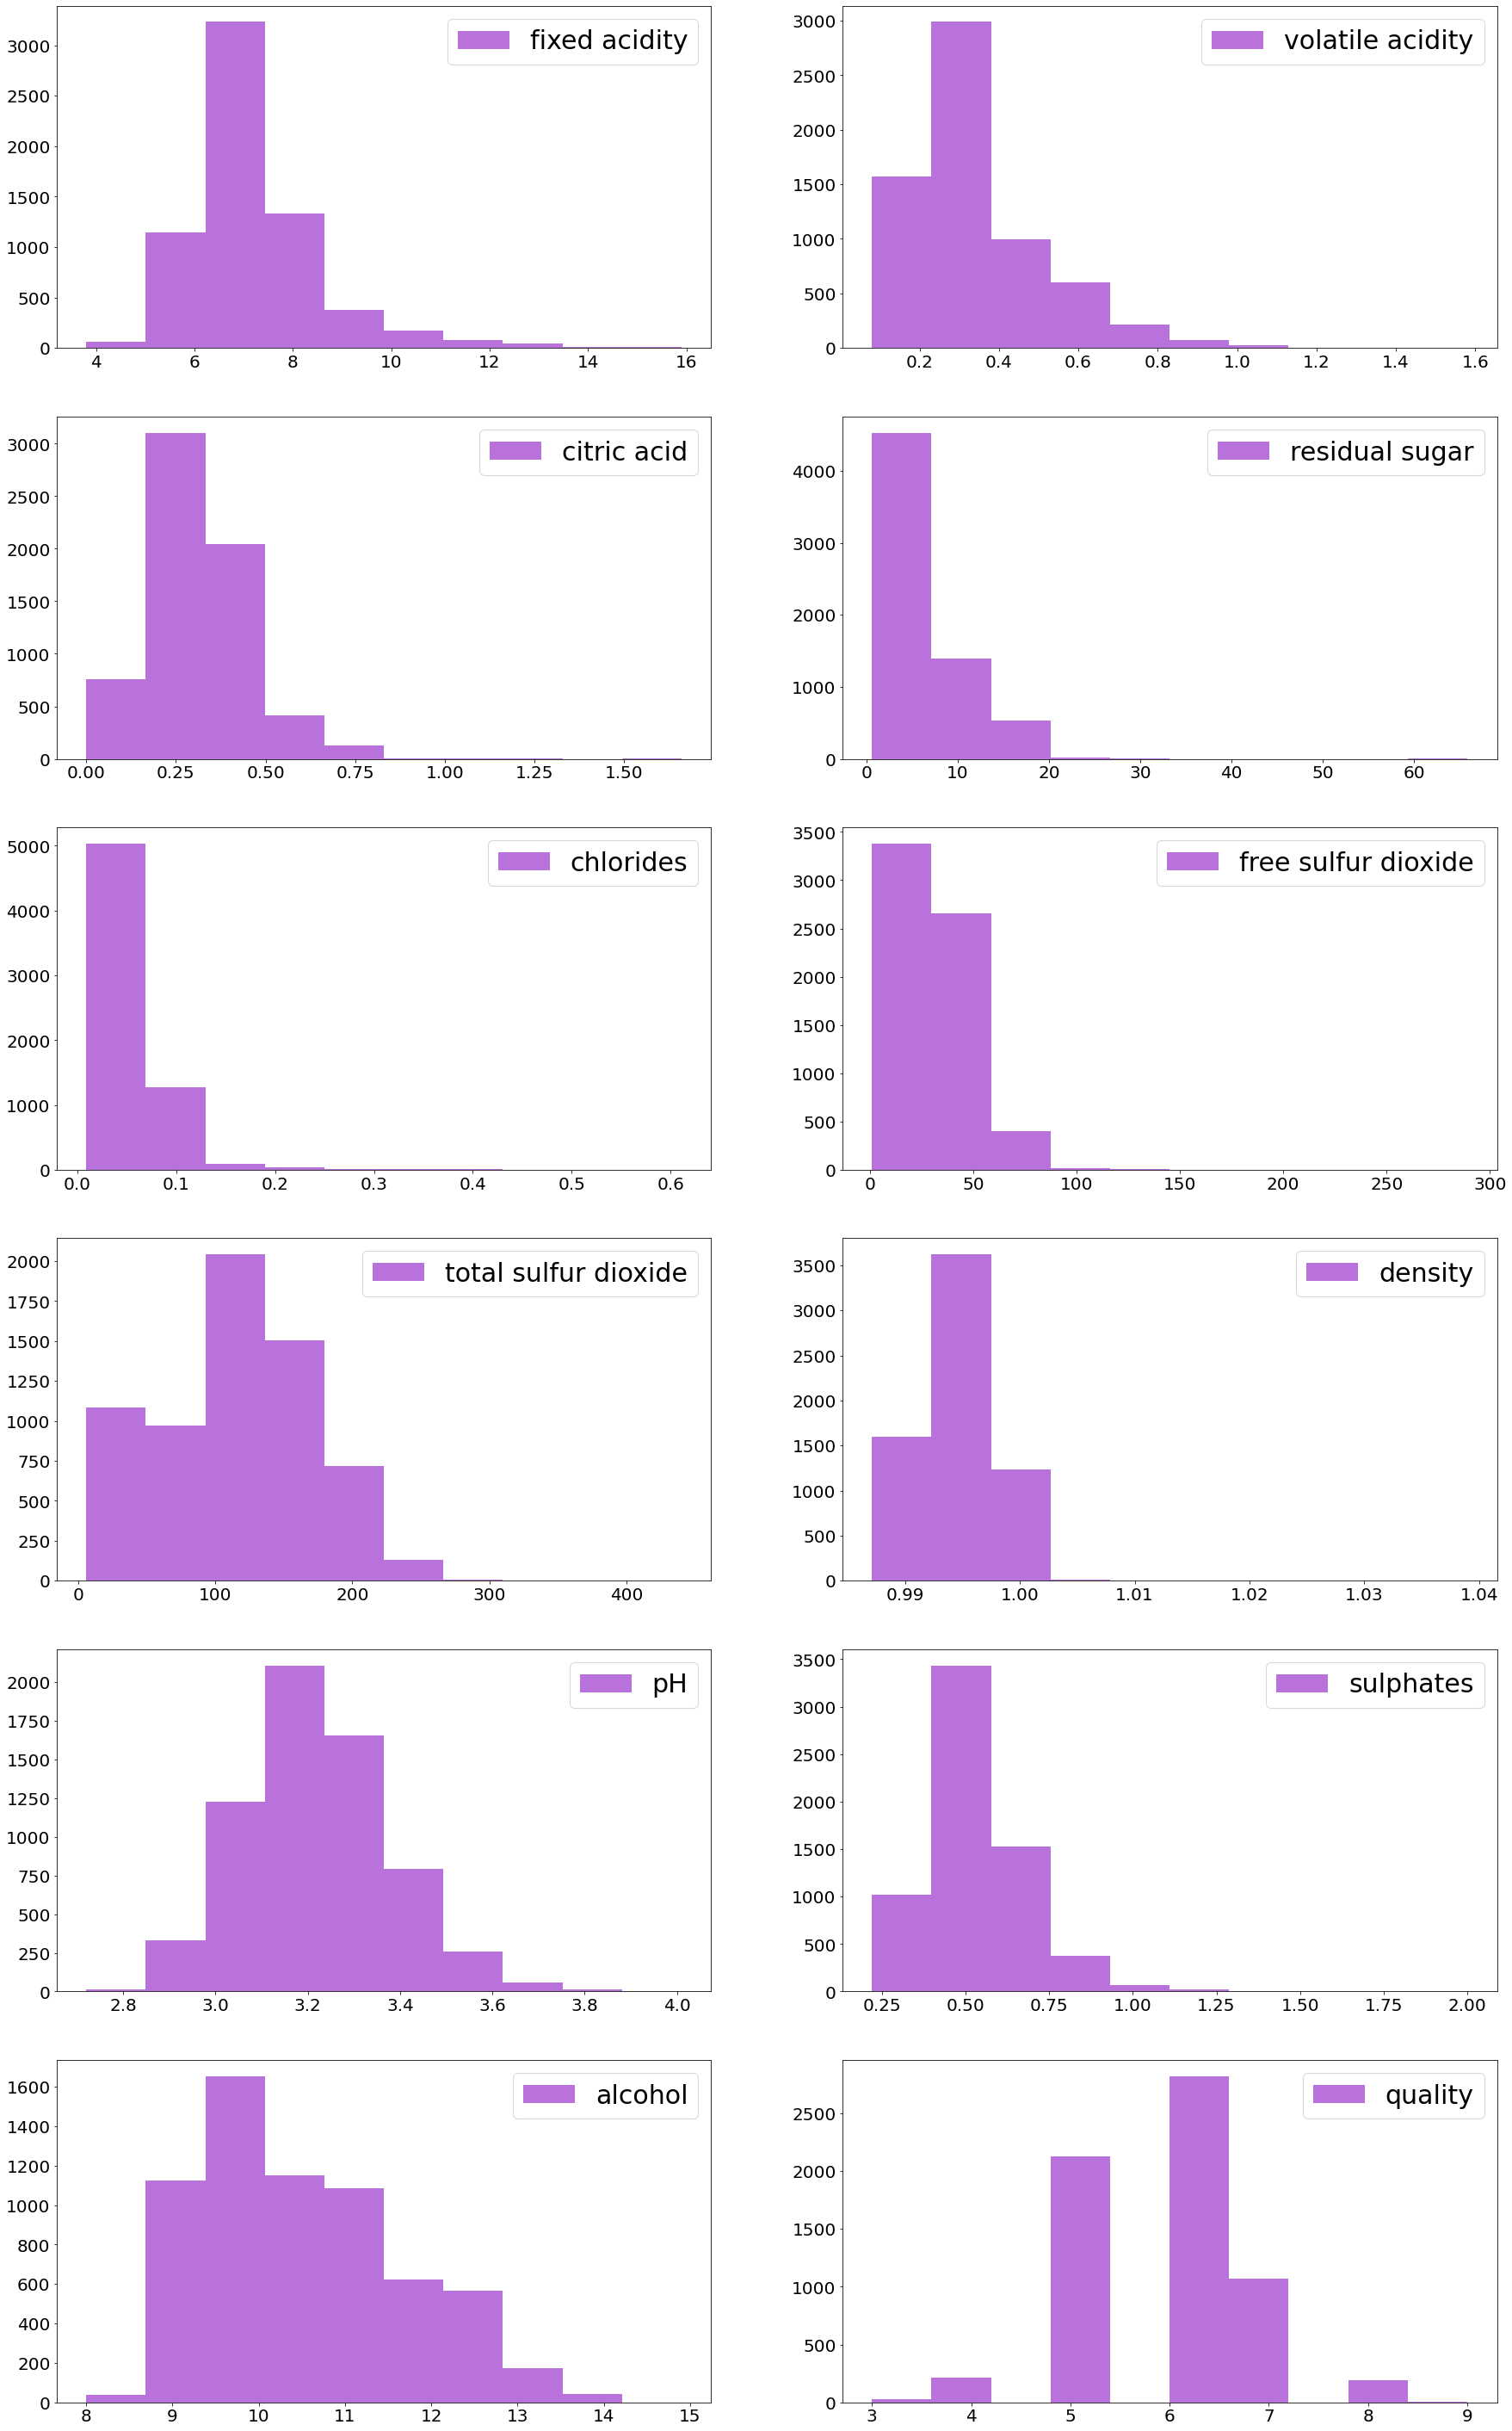

In [547]:
def plot_hist(data, names):
    plt.figure(figsize=(30, 60))
    plt.rc('legend', fontsize=30)  
    plt.rc('font', size=20)
    l = len(names)
    a = l // 2 + 1
    b = l // a + 1
    for i in range(l):
        x = plt.subplot(a, b, i + 1)
        val = data[names[i]]
        x.hist(val, color=colors[0], label=names[i]);
        x.legend()
        
plot_hist(mix_data, names[1:len(names)])

По гистограммам видно, что данные несбалансированы и присутствуют выбросы, убедимся в этом, построив графики значений:

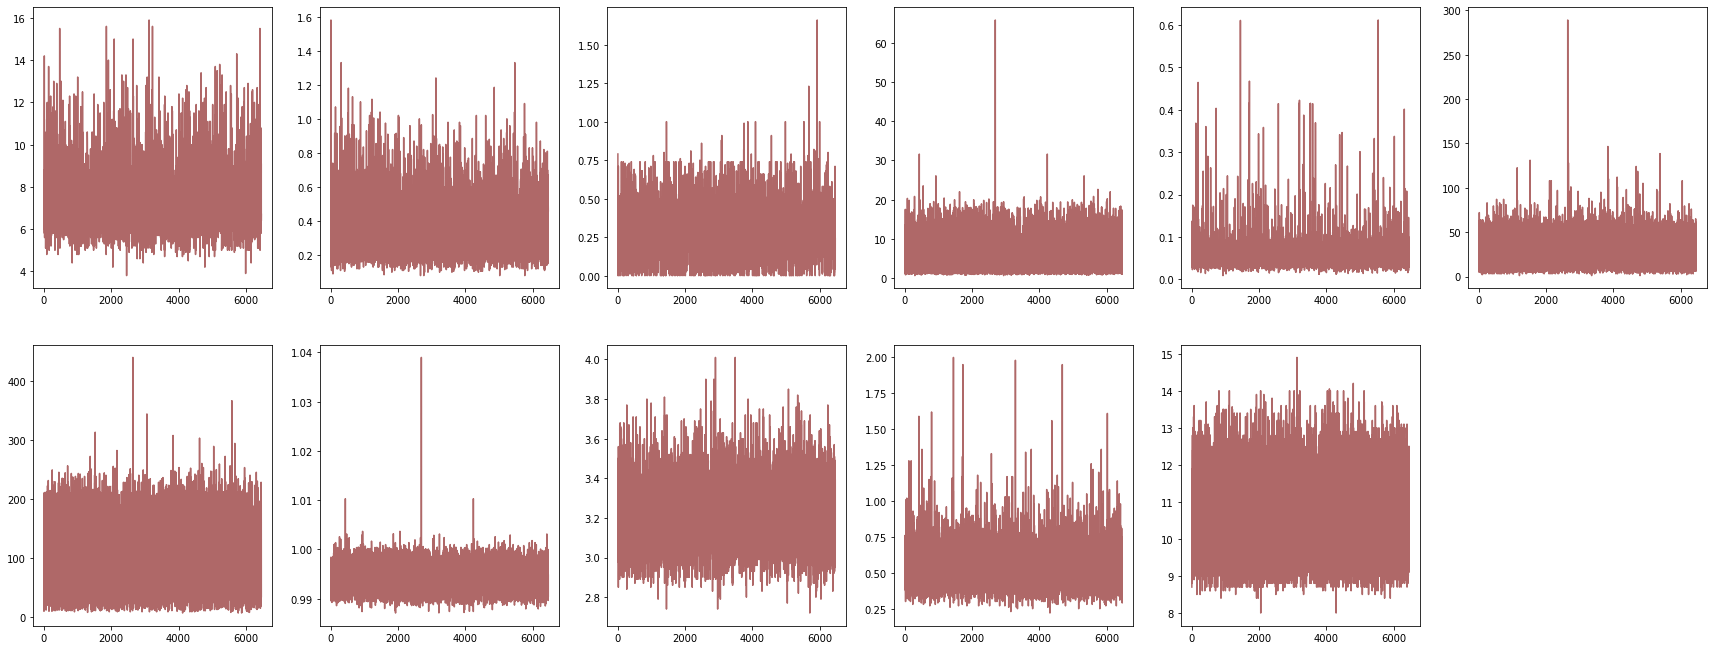

In [548]:
plt.rc('legend', fontsize=10)  
plt.rc('font', size=10)
def plot_box(data,names):
    data = data.sample(frac=1).reset_index(drop=True);
    plt.figure(figsize=(30, 30))
    l = len(names)
    a = l // 2
    b = l // 2 if l % 2 == 0 else l // 2 + 1
    for n in range(l):
        plt.subplot(a, b, n + 1)
        data[names[n]].plot(c=colors[3])
    
    plt.show()

plot_box(mix_data, names[1:len(names) - 1])

Бля более удобного аналища данных, используем boxplot для наглядной визуализации:

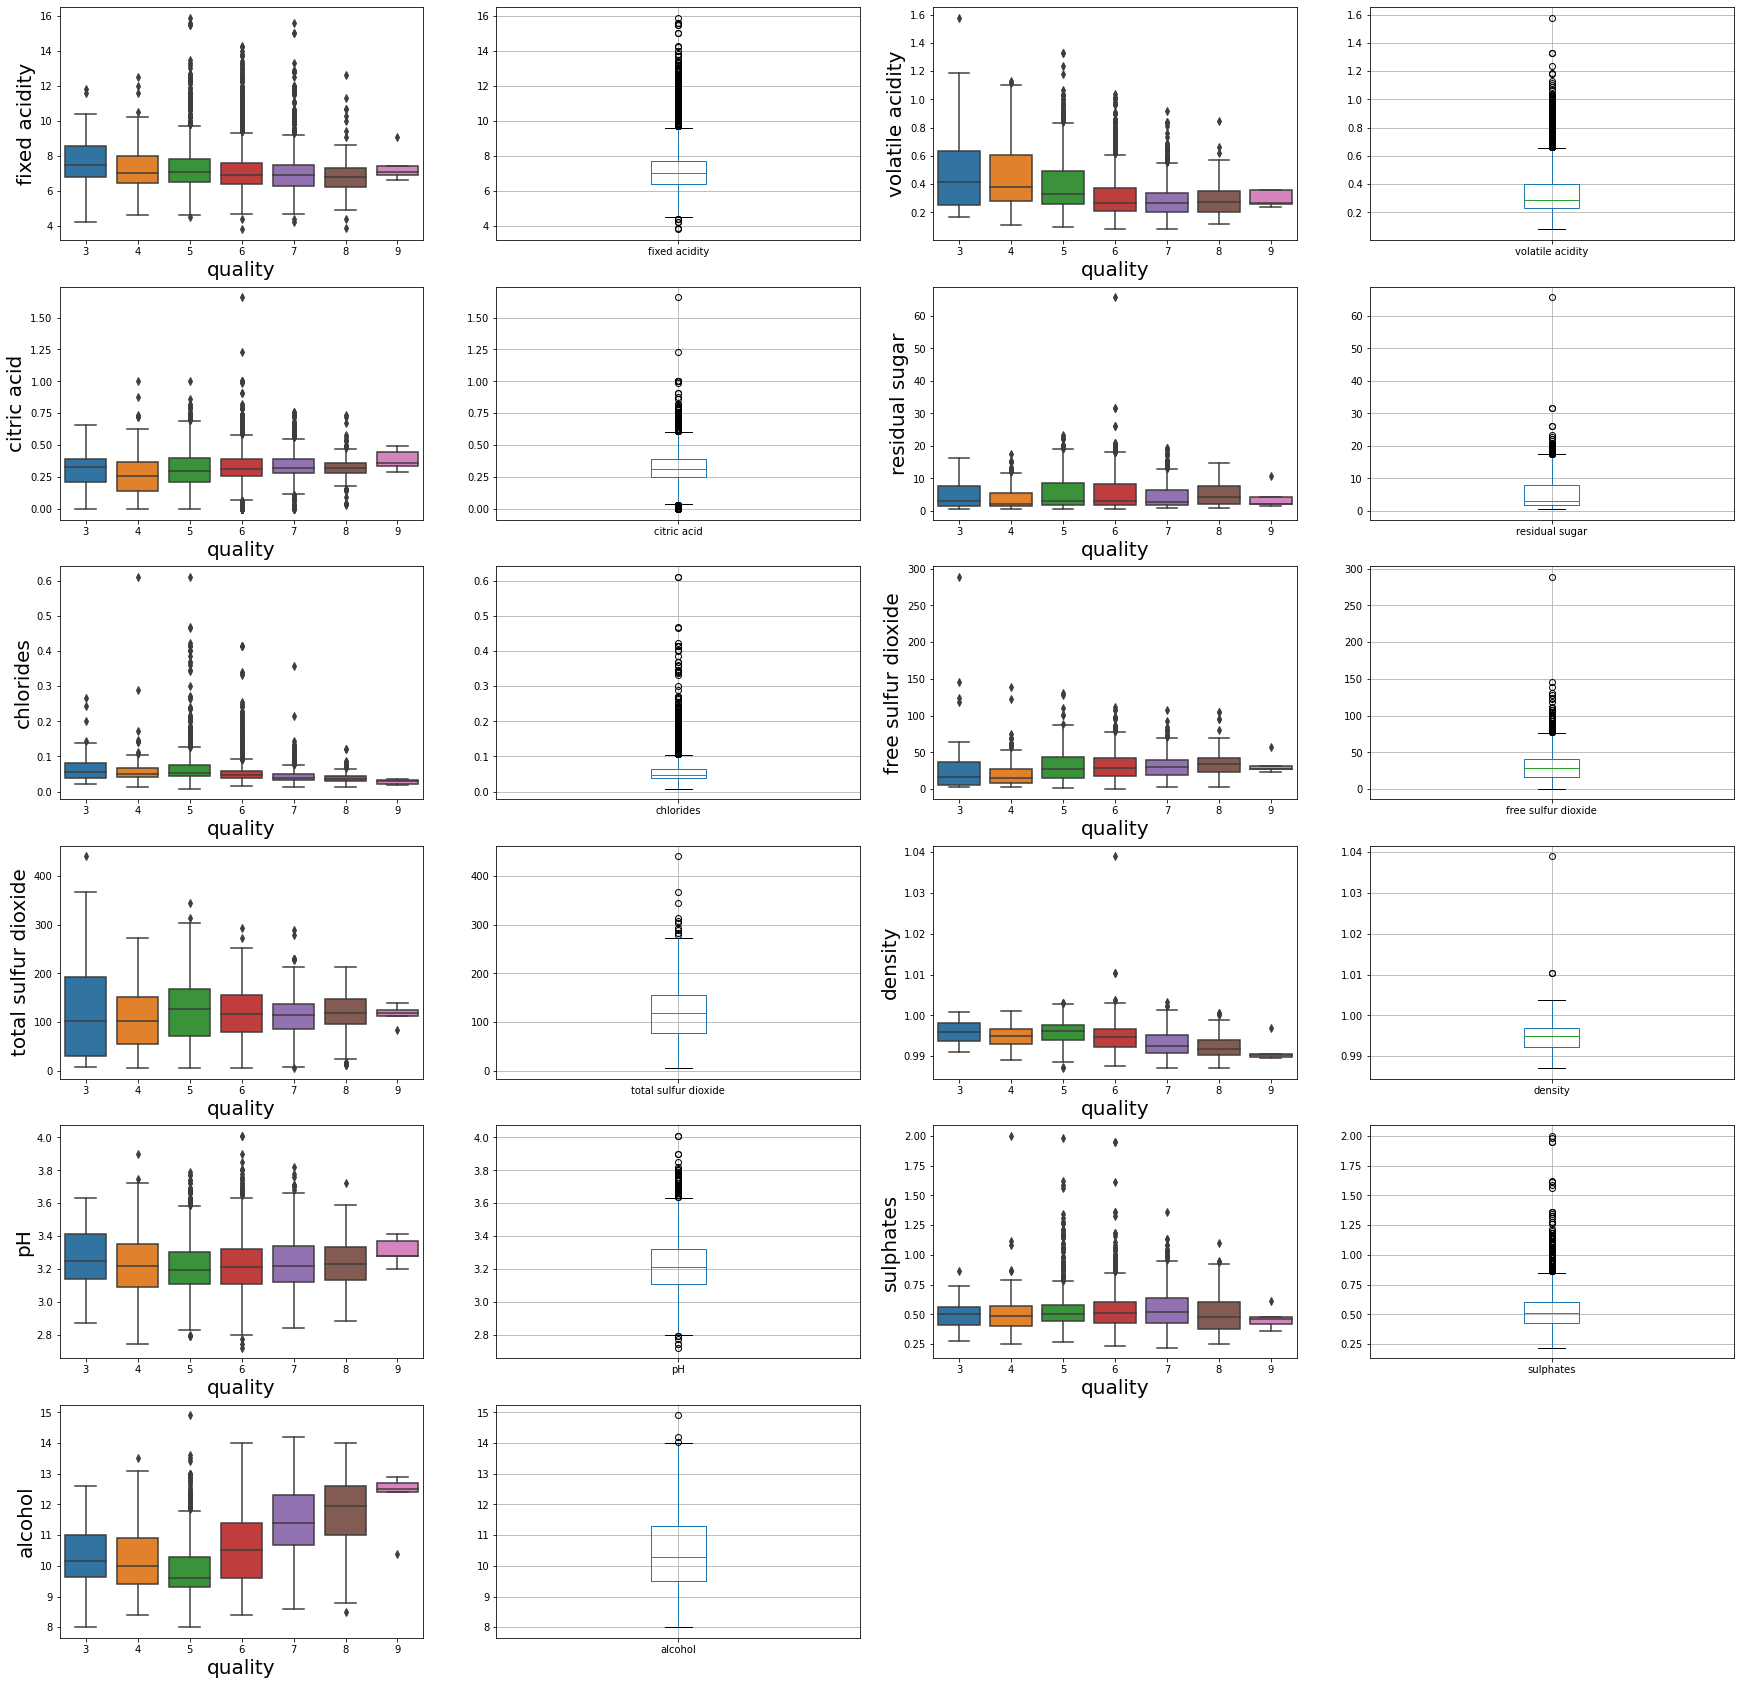

In [549]:
plt.rc('legend', fontsize=10)  
plt.rc('font', size=10)
def plot_box(data,names):
    data = data.sample(frac=1).reset_index(drop=True);
    plt.figure(figsize=(30, 30))
    l = len(names)
    a = l // 2 + 1
    b = (l // a + 1) * 2
    ind = 1
    for n in range(l):
        plt.subplot(a, b, ind)
        sns.boxplot(x = data['quality'] , y= data[names[n]])
        plt.subplot(a, b, ind+1)
        data.boxplot(names[n])
        ind += 2
    
    plt.show()

plot_box(mix_data, names[1:len(names) - 1])

Попробуем очистить данные от некоторых выбросов и посмотреть, как изменится корреляция характеристик

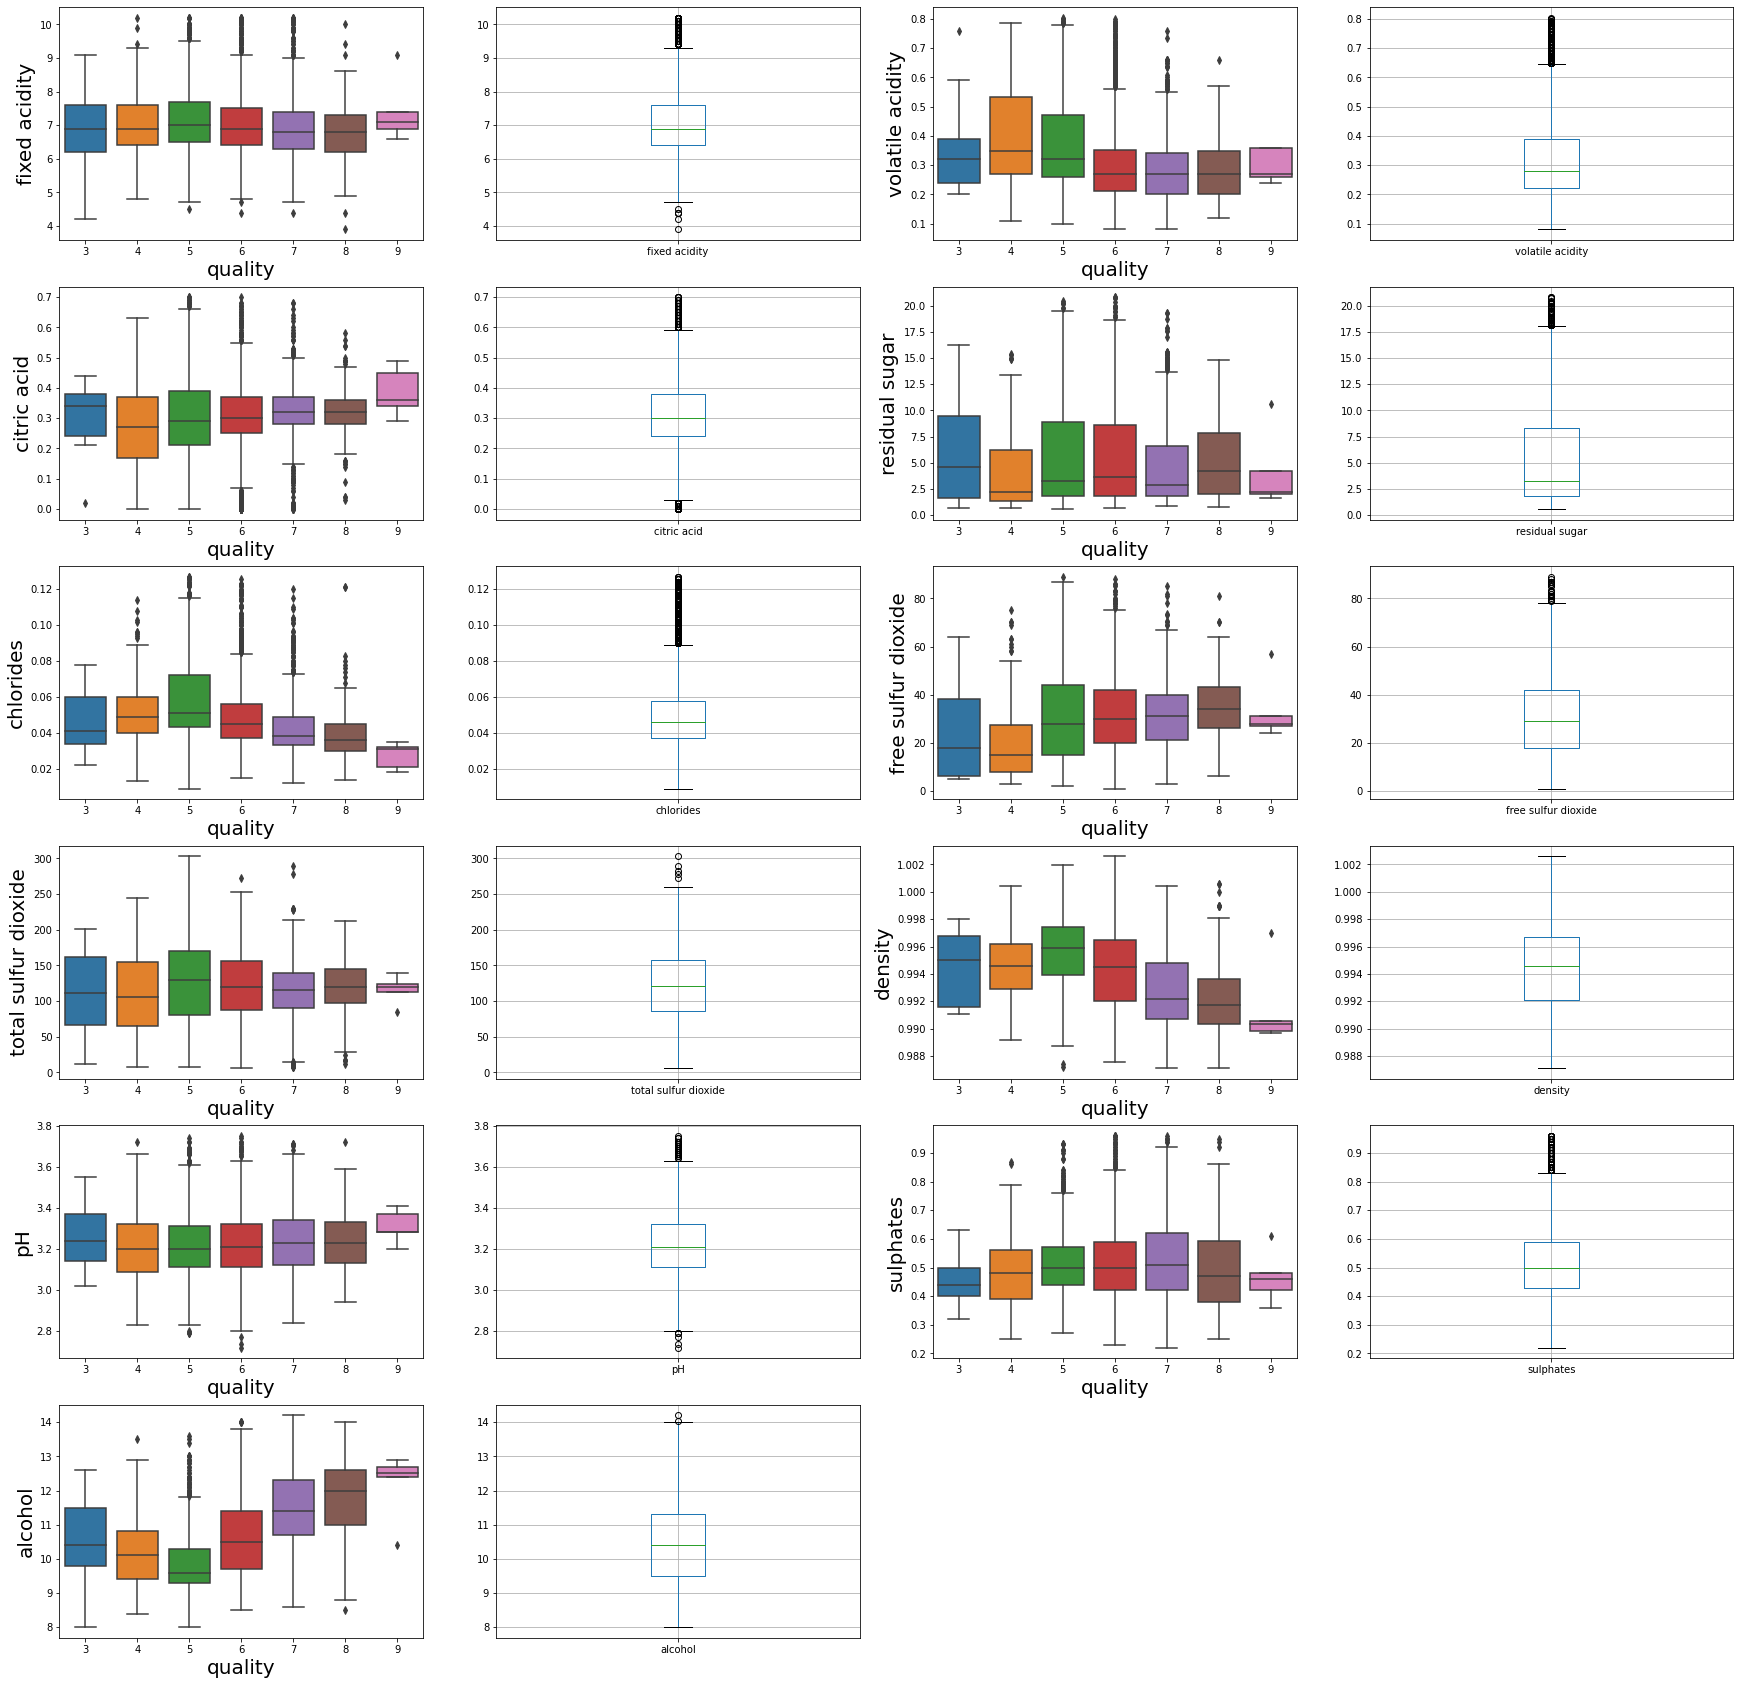

In [550]:
data_IQR = mix_data
for i in range(1, len(names) - 1):
    qv1 =  mix_data[names[i]].quantile(0.2)
    qv2 = mix_data[names[i]].quantile(0.8)
    between = qv2 - qv1
    data_IQR = data_IQR.loc[(mix_data[names[i]] > (qv1 - 1.5 * between)) & (mix_data[names[i]] < (qv2 + 1.5 * between))]

plot_box(data_IQR, names[1:len(names) - 1])


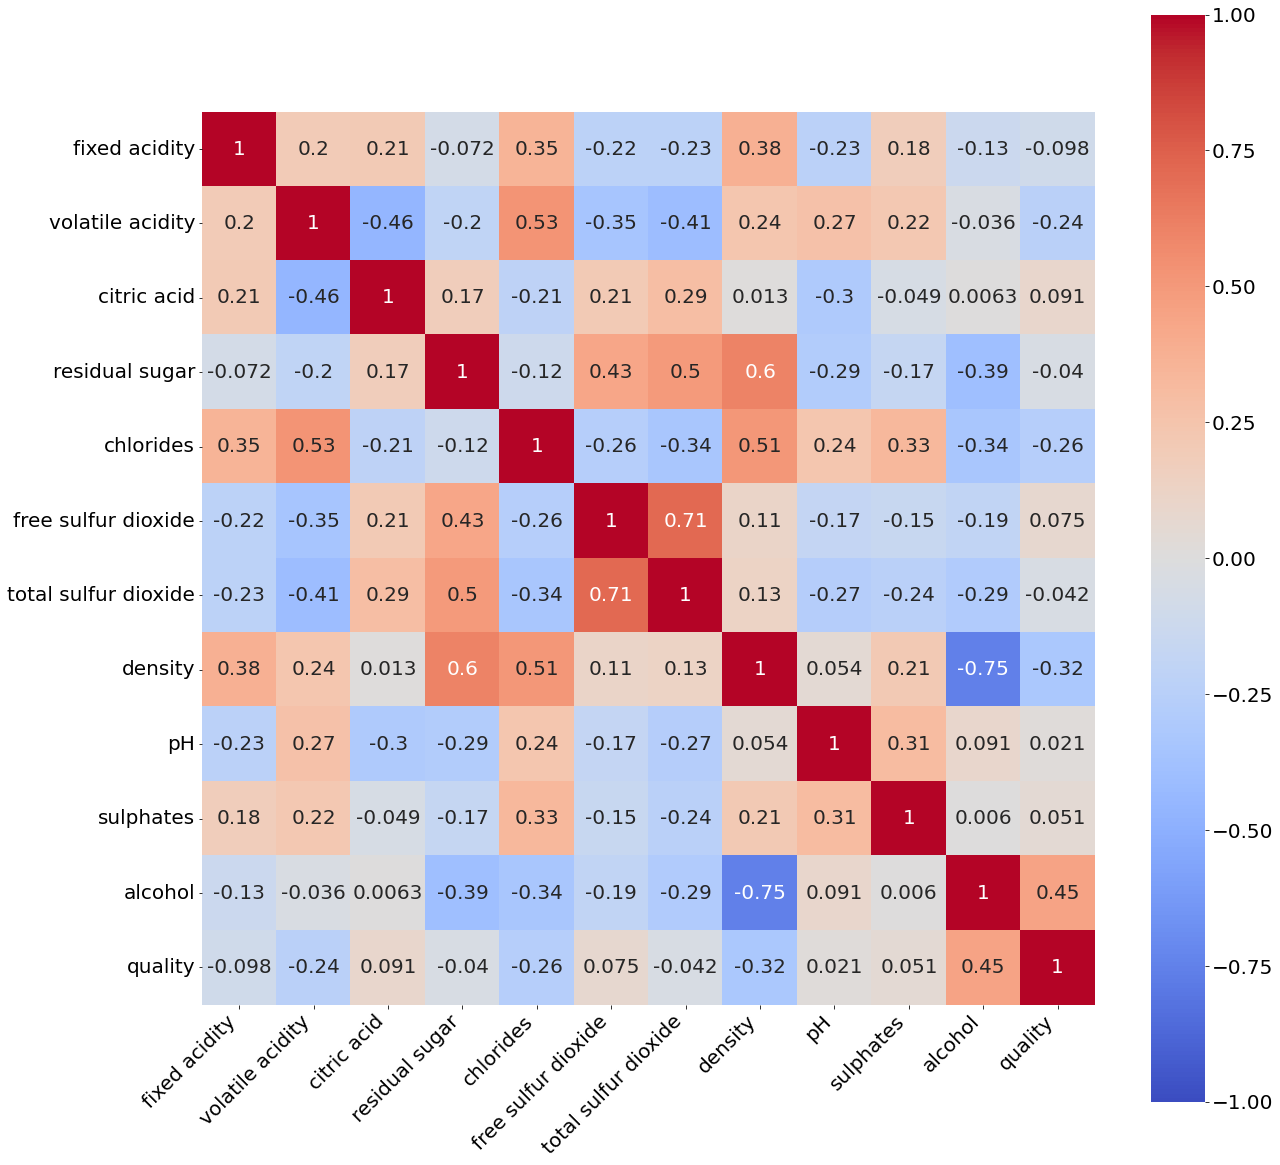

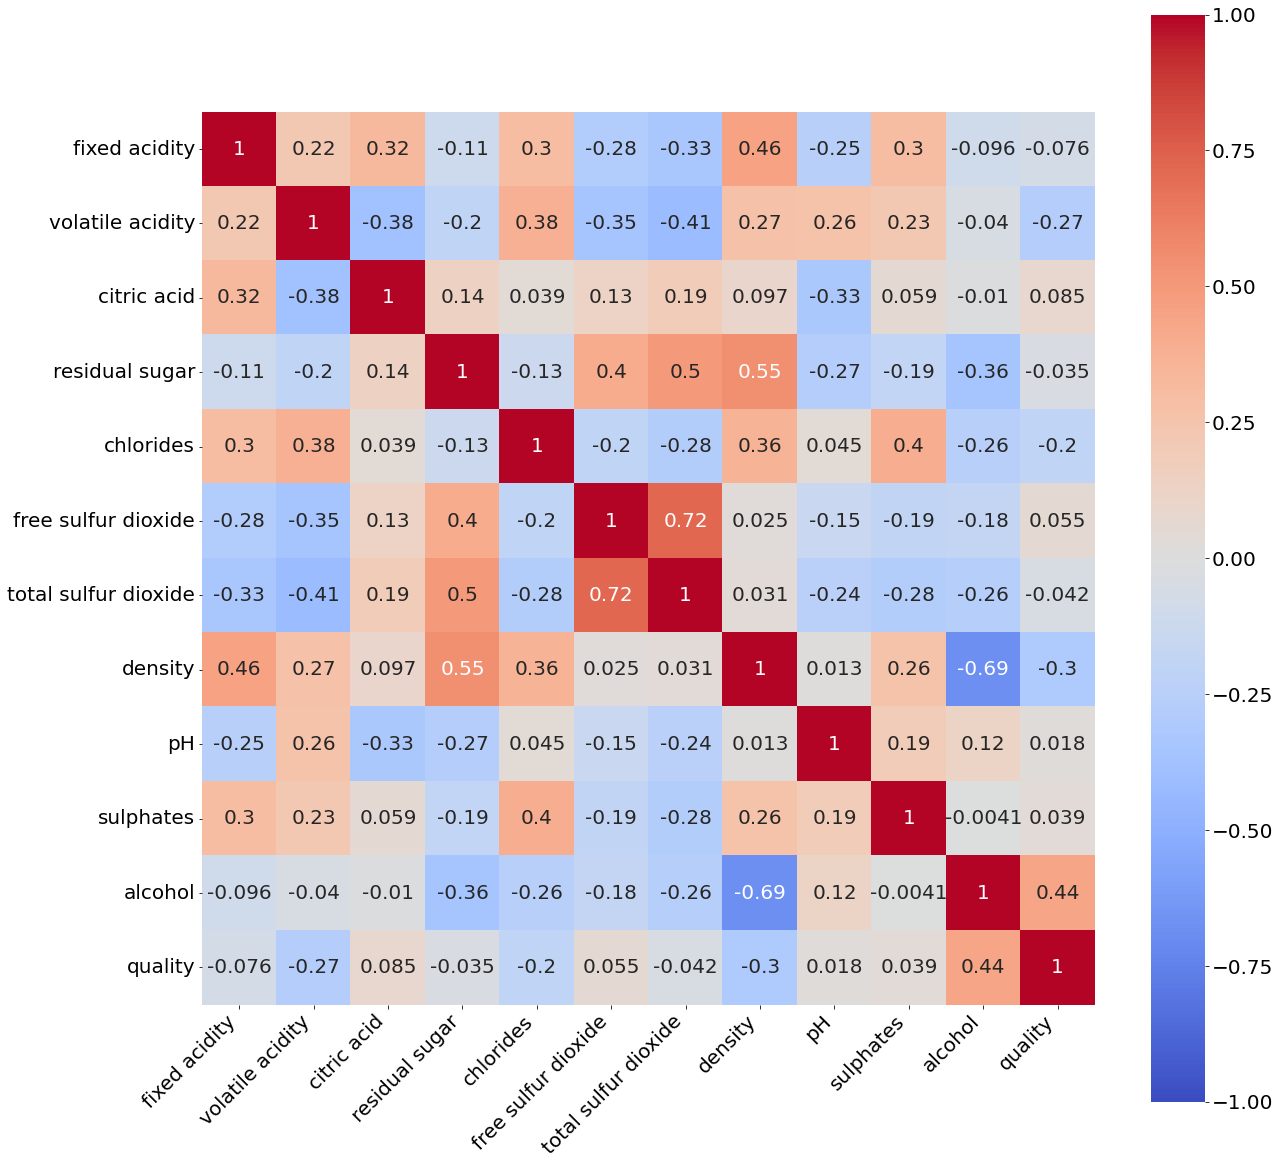

In [551]:
plt.rc('legend', fontsize=30)  
plt.rc('font', size=20)

corr = data_IQR.corr()
plt.figure(figsize=(20, 20))
ax = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap= 'coolwarm', square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.show()

corr = mix_data.corr()
plt.figure(figsize=(20, 20))
ax = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap= 'coolwarm', square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.show()

Анализируя матрицу можно увидеть, что зависимость признаков друг от друга где-то уменьшилась, а где-то увеличилать.
Также наблюдается, что плотность зависит(слабо) от большего количества призноков, чем остальные характеристики)

Посмотрим на зависимость плотности от других характеристик на графиках

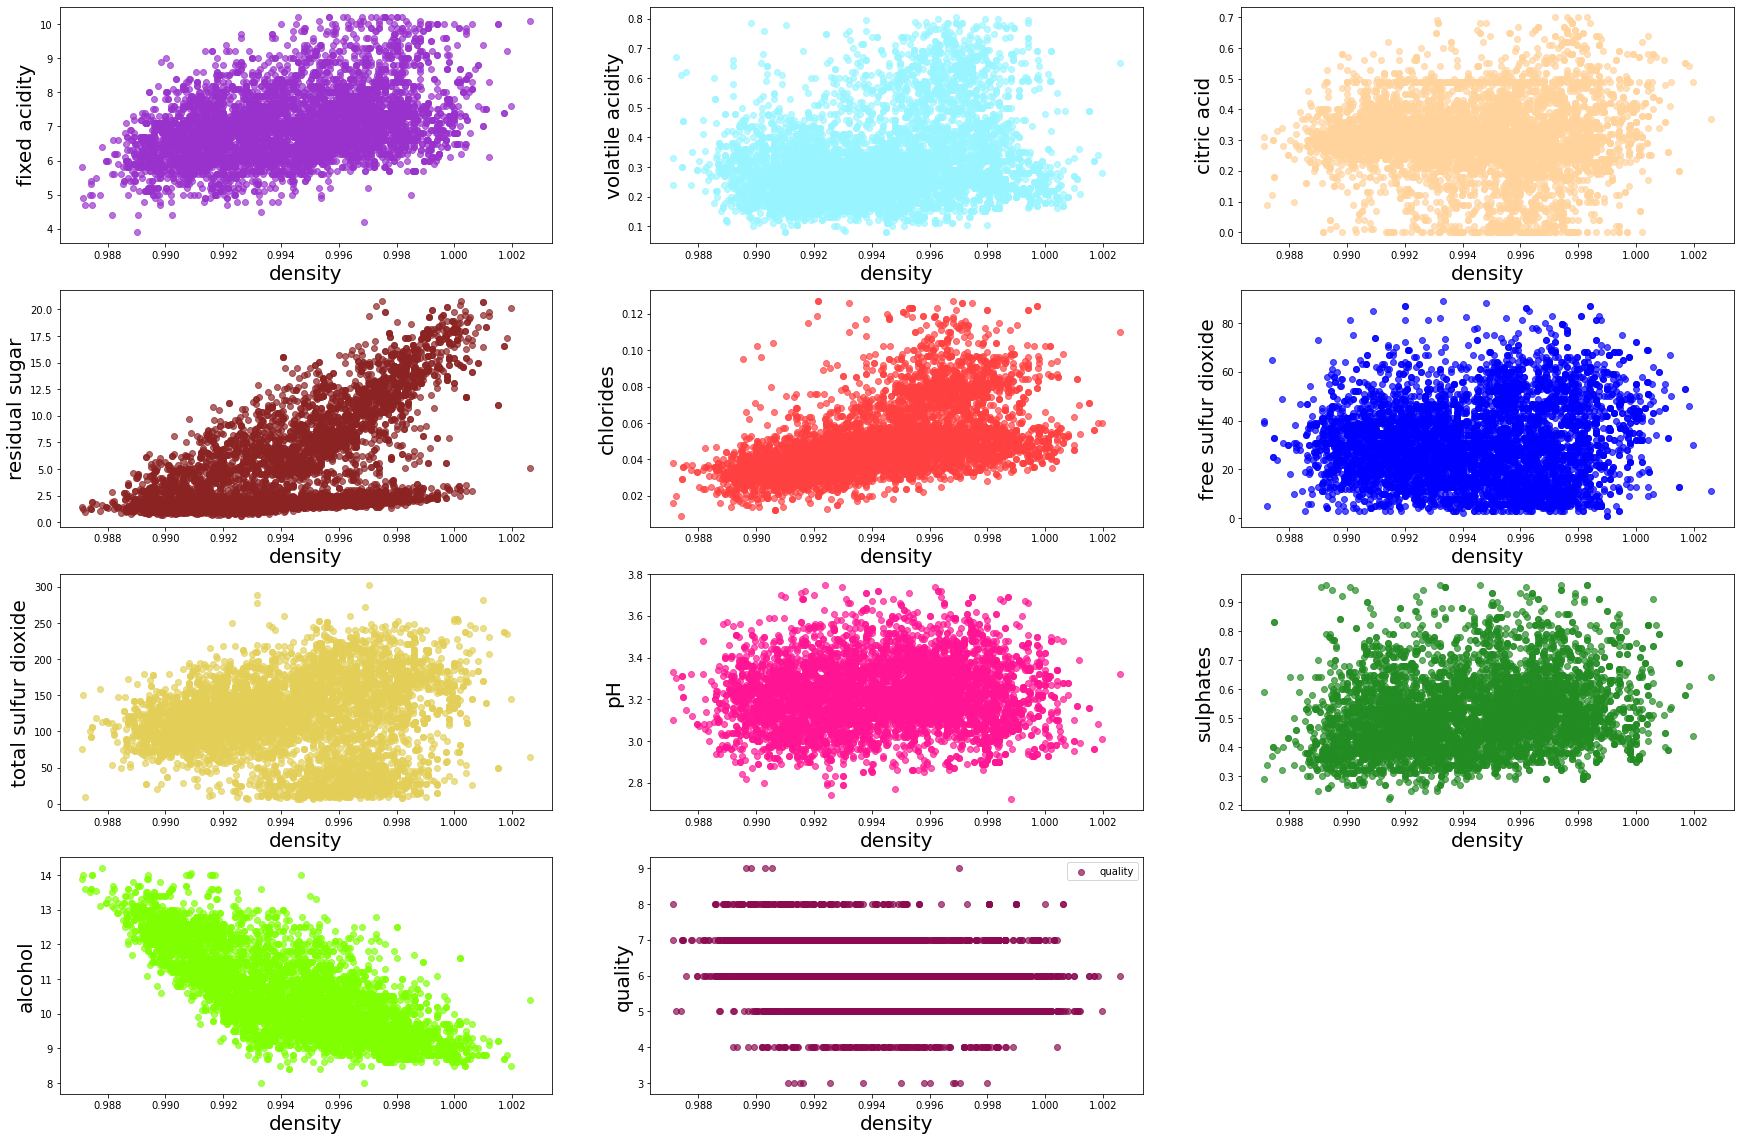

In [552]:
plt.rc('legend', fontsize=10)  
plt.rc('font', size=10)
def plot_scatter(data, name1, names):
    plt.figure(figsize=(30, 20))
    l = len(names)
    a = l // 3 + 1
    b = l // a + 1
    count = 1
    for i in range(l):
        if names[i] != name1:
            ax = plt.subplot(a, b, count)
            count += 1;
            x = data[name1]
            y = data[names[i]]
            ax.scatter(x, y, c=colors[i], label = names[i])
            plt.xlabel(name1)
            plt.ylabel(names[i])   
    plt.legend()
    plt.show()
plot_scatter(data_IQR, 'density', names[1:])

Посмотрим на параметр качества вина, примененный к данным графикам:

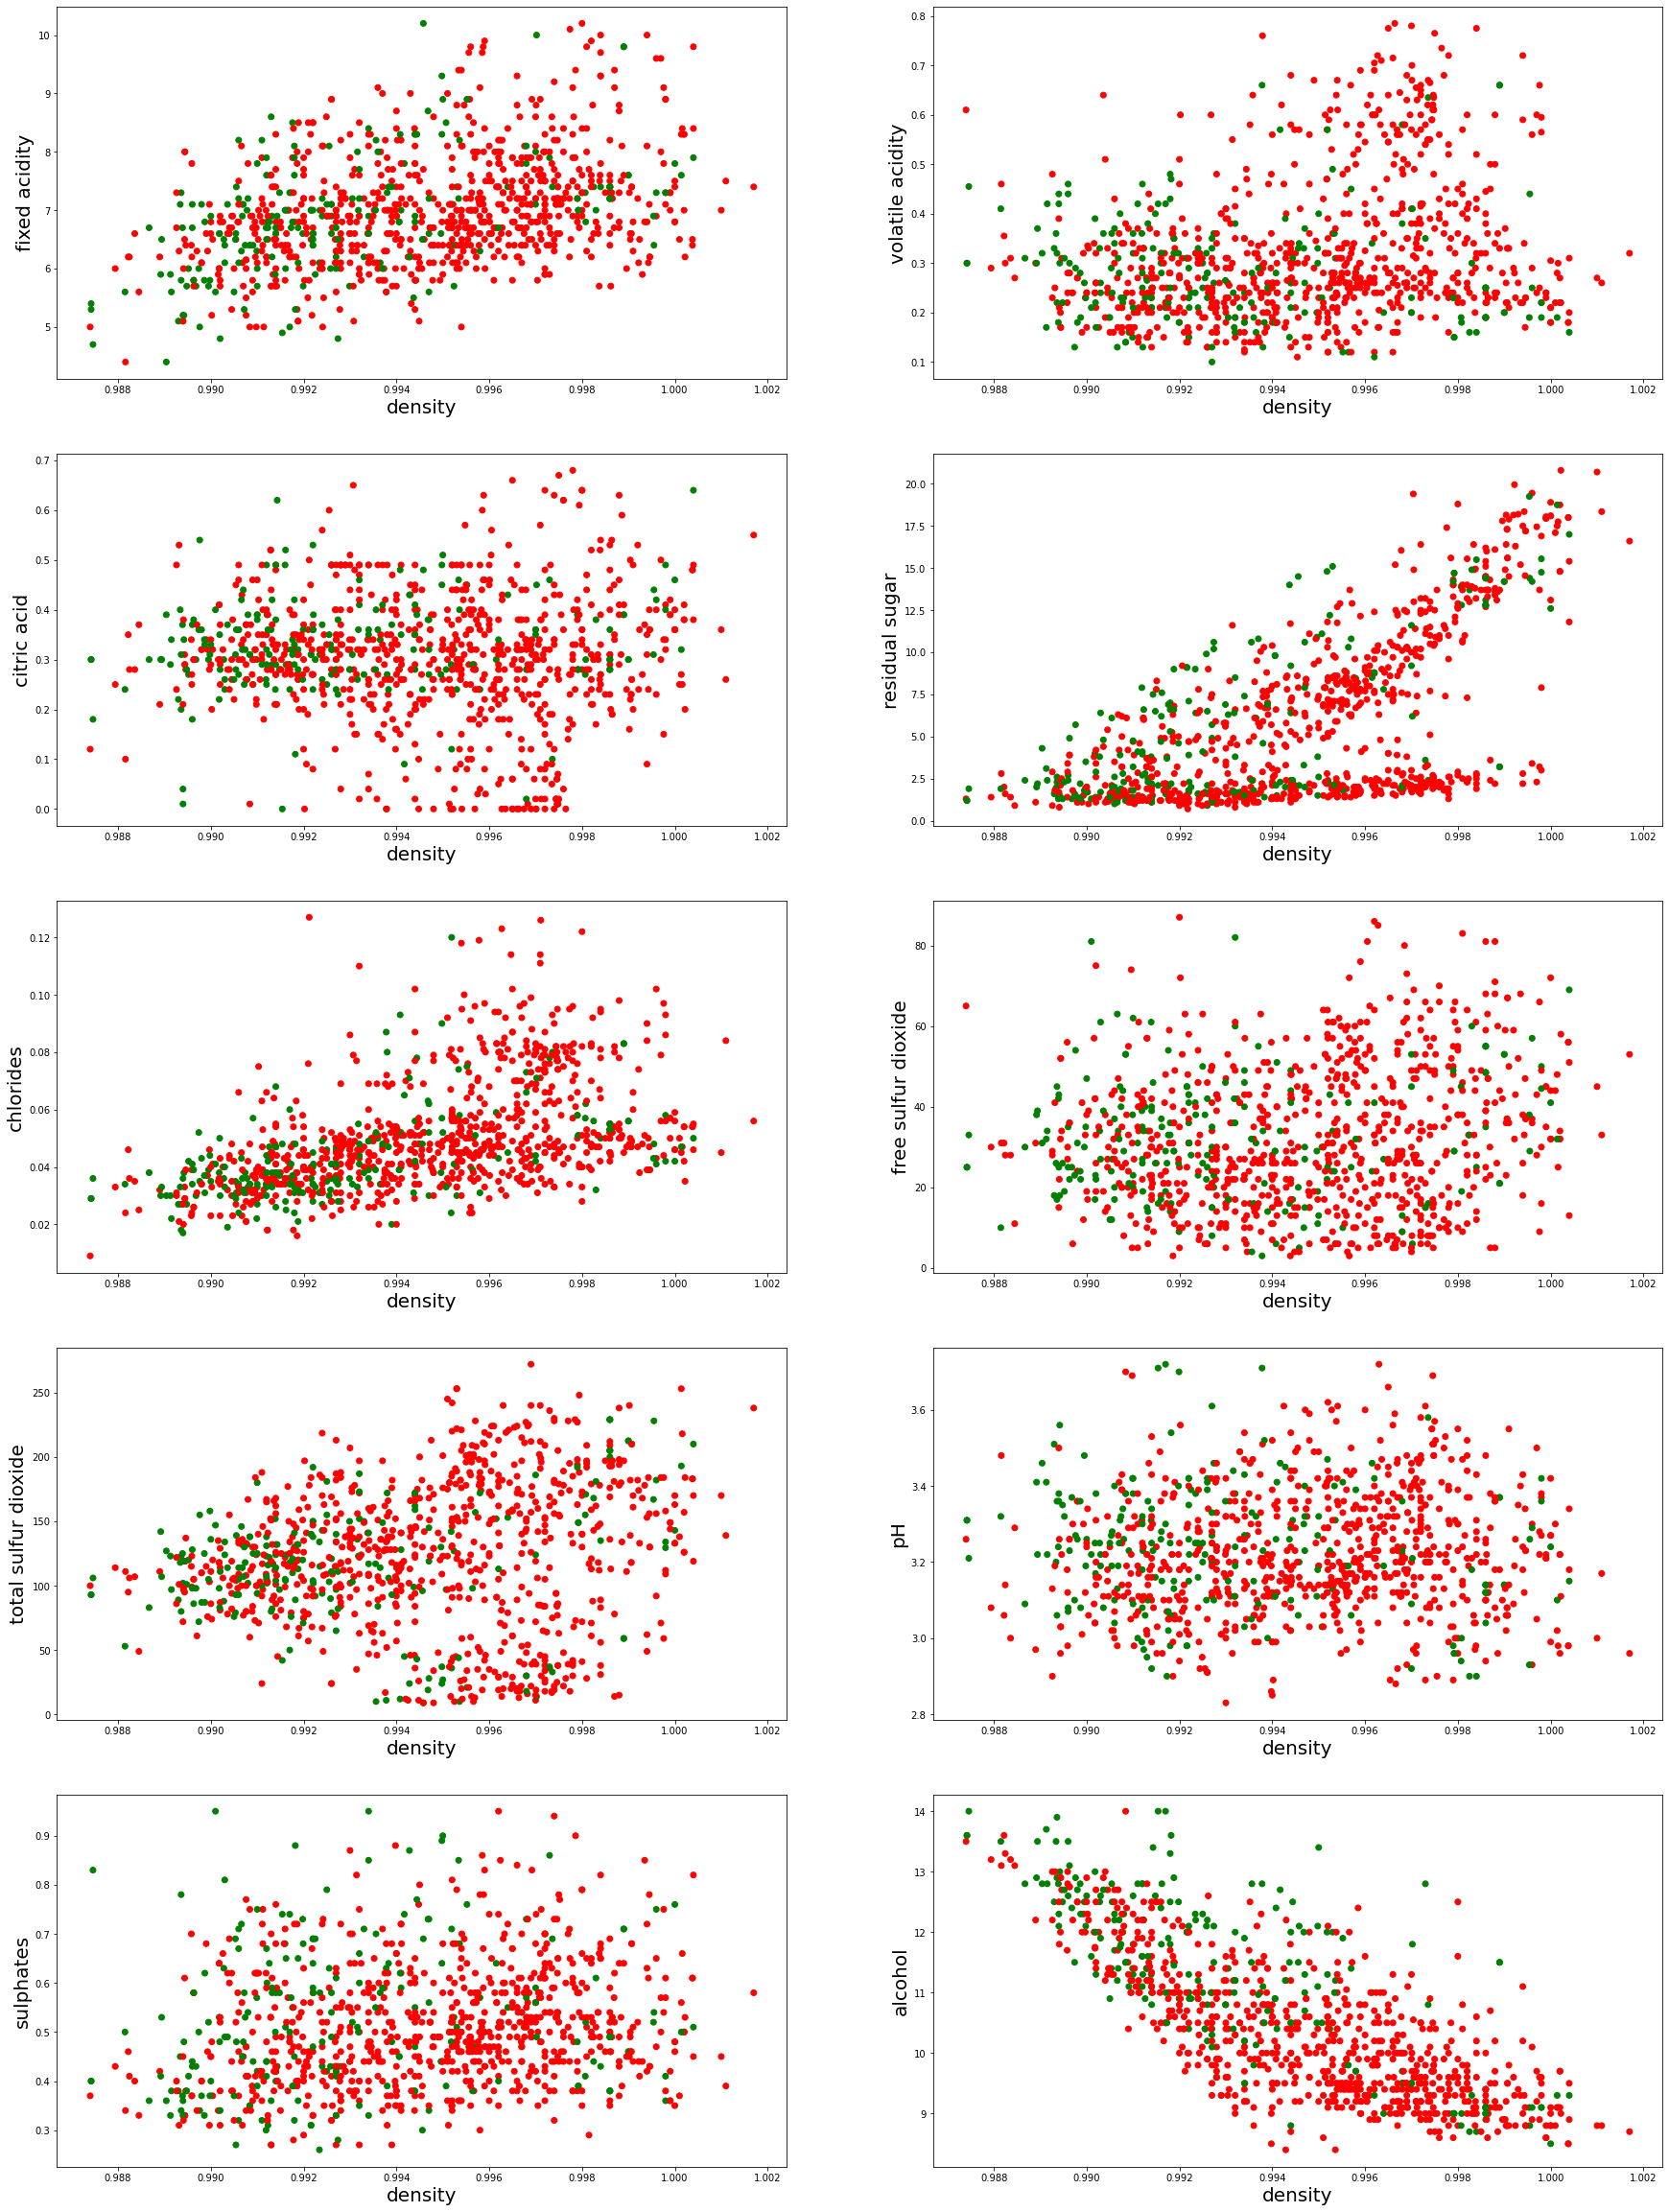

In [635]:
def plot_point(data, name1, names):
    plt.figure(figsize=(30, 50))
    palett = sns.diverging_palette(240, 10, n=10)
    l = len(names)
    a = (l - 1) // 2 + 1
    b = (l - 1) // a + 1
    count = 1
    for n in range(l):
        if names[n] != name1:
            plt.subplot(a, b, count)
            count += 1
            x = data[name1].tolist()
            y = data[names[n]].tolist()
            colors = np.full(len(x), 'g')
            q = data['quality'].tolist()
            for i in range(len(colors)):
                if q[i] <= 6:
                    colors[i] = 'r'
            plt.scatter(x[:1000], y[:1000], c= colors[:1000])
            plt.xlabel(name1)
            plt.ylabel(names[n])
    
    plt.show()

plot_point(data_IQR, 'density', names[1:len(names) - 1])